# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_cluster = pd.read_csv('arrow_cluster_jobs.csv')

In [3]:
df_cluster.keys()

Index(['duration', 'input_size', 'cost', 'cost_norm', 'scaleout', 'mtype',
       'cores', 'total_cores', 'memory', 'total_memory',
       ...
       'agg_disk.%util', 'agg_network.rxpck/s', 'agg_network.txpck/s',
       'agg_network.rxkB/s', 'agg_network.txkB/s', 'agg_network.rxcmp/s',
       'agg_network.txcmp/s', 'agg_network.rxmcst/s', 'agg_network.%ifutil',
       'bread'],
      dtype='object', length=160)

In [4]:
cluster_jobs = list(sorted(set(df_cluster['job'])))

print(f"{len(cluster_jobs) = }")

len(cluster_jobs) = 16


In [5]:
color_map = {'c4': 'royalblue', 'm4':'mediumorchid', 'r4':'red'}

color_map = {'c4.l':'lightskyblue', 'c4.x':'cornflowerblue', 'c4.2':'mediumblue',
             'm4.l': 'violet'     , 'm4.x':'mediumorchid'  , 'm4.2':'purple',
             'r4.l':'lightsalmon' , 'r4.x': 'tomato'       , 'r4.2':'crimson'}

def get_color(mtype):
    for k, v in color_map.items():
        if k in mtype: return v
    return 'black'

## Memory Bottlenecks

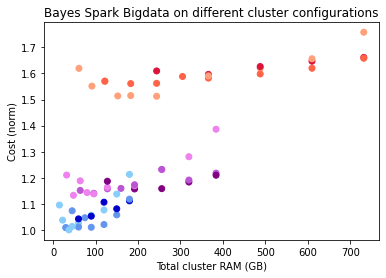

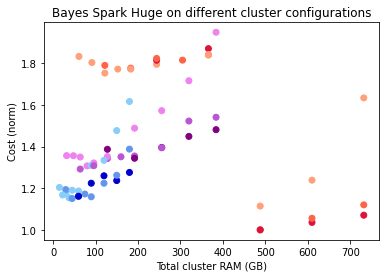

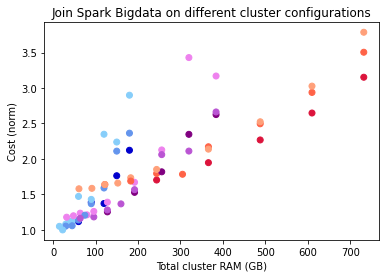

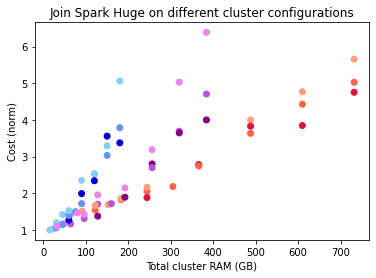

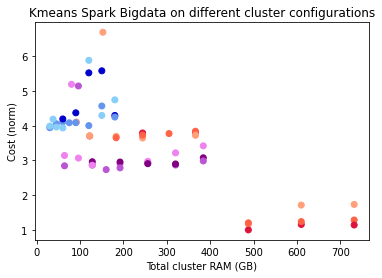

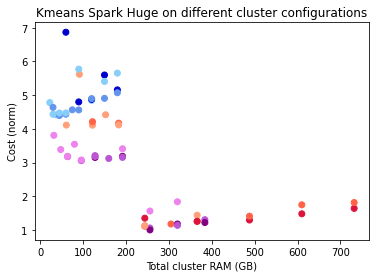

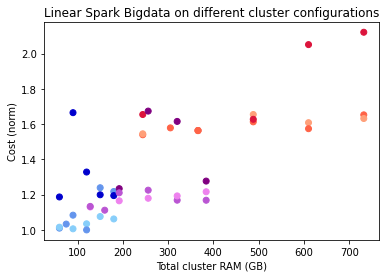

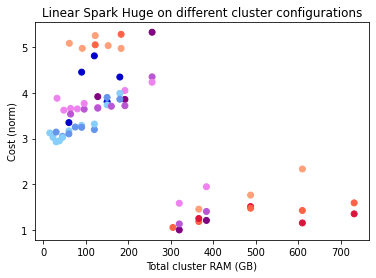

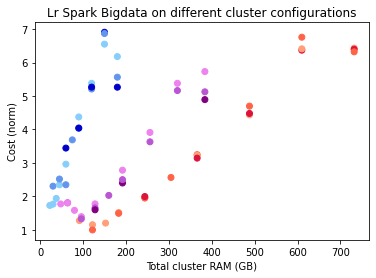

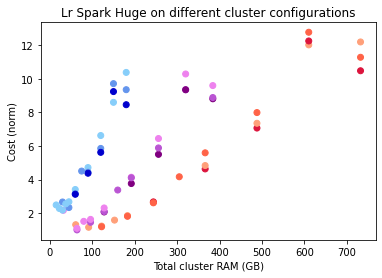

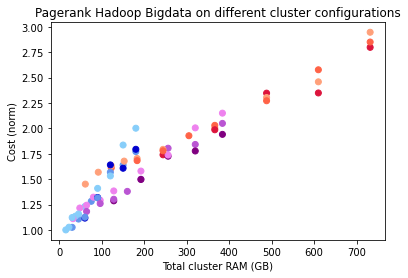

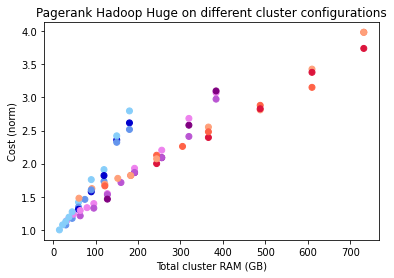

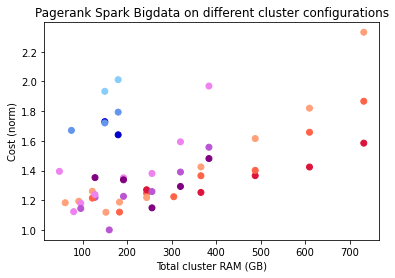

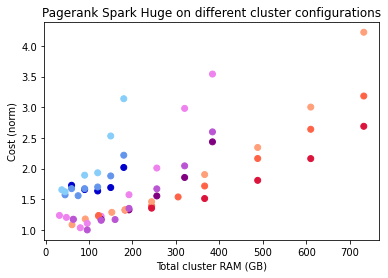

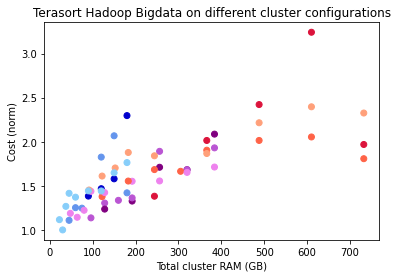

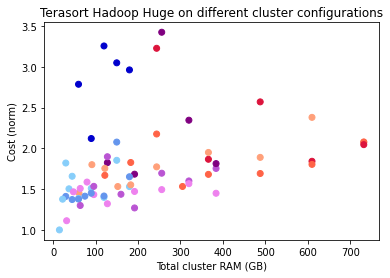

In [6]:
for job in cluster_jobs:
    job_df = df_cluster[df_cluster['job']==job]
    total_memory, cost_norm = job_df['total_memory'], job_df['cost_norm'] 
    color = [get_color(mtype) for mtype in job_df['mtype']]
    plt.title(f"{' '.join(s.title() for s in job.split('_'))} on different cluster configurations")
    plt.scatter(total_memory, cost_norm, c=color, )
    plt.xlabel('Total cluster RAM (GB)'); plt.ylabel('Cost (norm)')
    plt.show()

## Measured Memory Usage

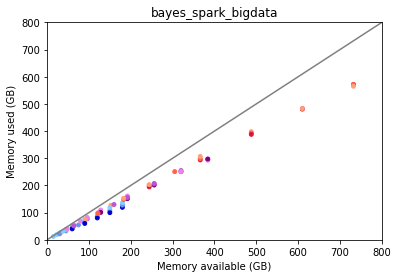

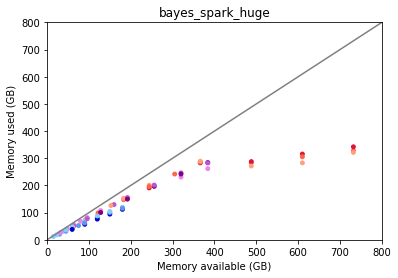

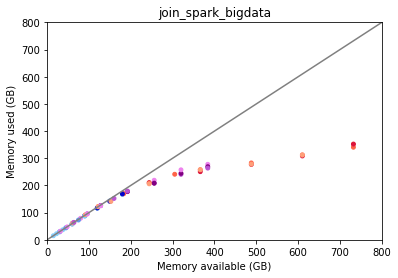

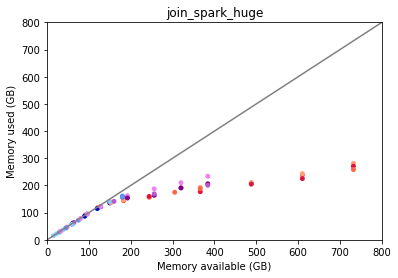

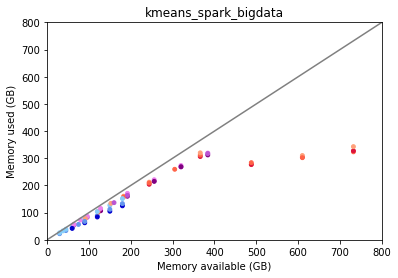

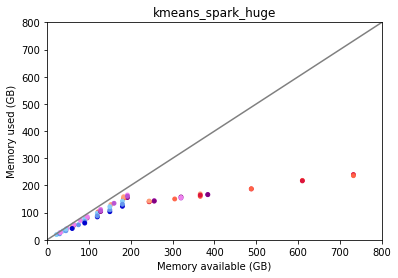

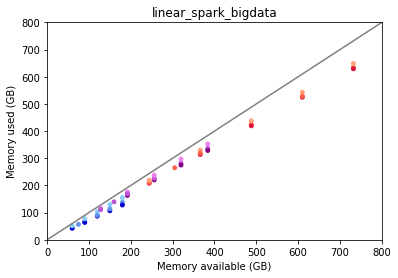

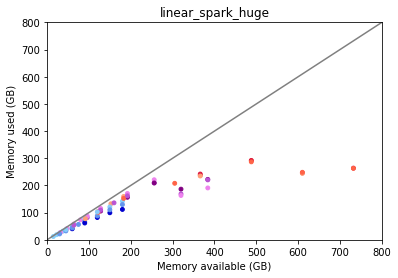

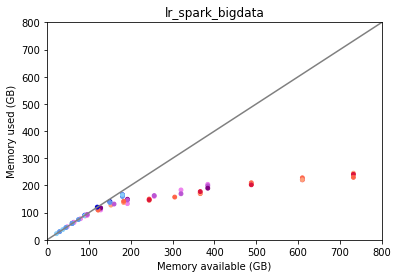

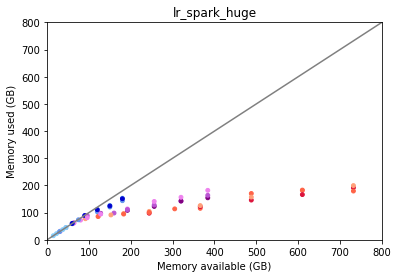

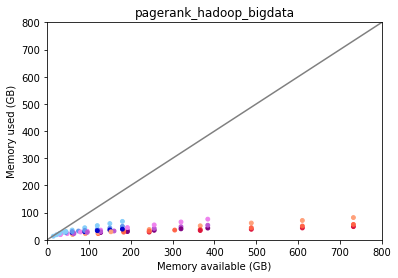

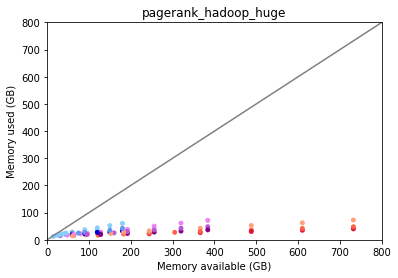

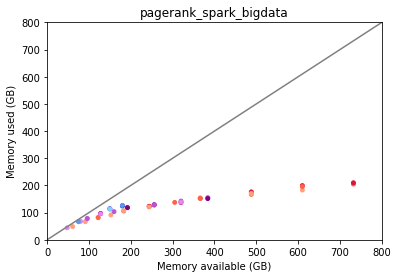

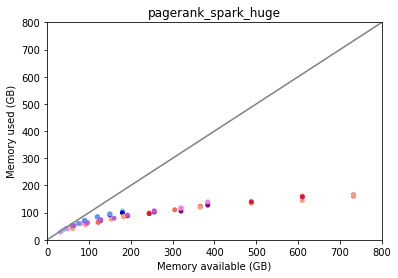

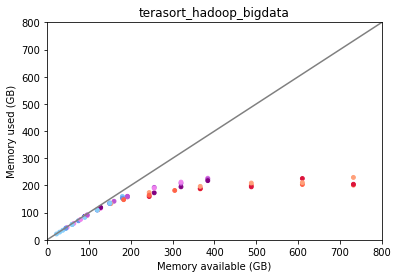

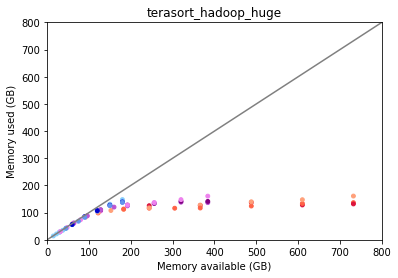

In [7]:
for job in cluster_jobs:
    df = df_cluster[df_cluster['job'] == job]
    li_mem_available = []
    li_mem_used = []
    colors = []
    for i, run in df.iterrows():
        mem_used = (run['memory.kbmemused']*run['scaleout'])/1e6
        mem_available = run['total_memory']
        li_mem_used.append(mem_used)
        li_mem_available.append(mem_available)
        colors.append(get_color(run['mtype']))


    plt.title(job)
    plt.scatter(li_mem_available, li_mem_used, s=15, c=colors)
    plt.xlim(0,800)
    plt.ylim(0,800)
    plt.ylabel('Memory used (GB)')
    plt.xlabel('Memory available (GB)')
    plt.plot(list(range(800)), list(range(800)), color='gray')
    plt.show()